# Les deux prochaines cellules execute notre réseau sur les données mise sous la même échelles (nbr 1 = nbr 0)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, random, cv2, pickle, json, itertools

from IPython.display import SVG
from tensorflow.keras.utils import plot_model, model_to_dot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.utils import class_weight
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Add, Input, Conv2D, Dropout, Activation, BatchNormalization, MaxPool2D, ZeroPadding2D, AveragePooling2D, Flatten, Dense)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import *

train_scale = ImageDataGenerator(rescale = 1/255)
validation_scale = ImageDataGenerator(rescale = 1/255)

train_dataset_scale = train_scale.flow_from_directory("./train/", target_size = (80,80), batch_size = 200)

val_dataset_scale = train_scale.flow_from_directory("./val/", batch_size = 200, target_size = (80,80))

model_scale = Sequential([
    Input(shape=(80,80,3)),
    ZeroPadding2D((5,5)),
    Conv2D(16, 3, activation='relu'),
    BatchNormalization(),
    Conv2D(32, 3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    Conv2D(32, 5, activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    Conv2D(64, 3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model_scale.summary()


checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False,
    save_frequency=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=50,
    verbose=1,
    mode='auto'
)

opt = Adam(learning_rate=1e-3)

callbacks = [checkpoint,earlystop]

model_scale.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

epochs = 75
batch_size = 16

history_scale = model_scale.fit(
    train_dataset_scale,
    batch_size=batch_size,
    steps_per_epoch=42724//batch_size//13,
    epochs=epochs,
    validation_data=val_dataset_scale,
    validation_steps=18310//batch_size//13,
    callbacks=callbacks
    )

def show_final_history(history):
    
    plt.style.use("ggplot")
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].set_title('Loss')
    ax[1].set_title('Accuracy')
    ax[0].plot(history.history['loss'],label='Train Loss')
    ax[0].plot(history.history['val_loss'],label='Validation Loss')
    ax[1].plot(history.history['accuracy'],label='Train Accuracy')
    ax[1].plot(history.history['val_accuracy'],label='Validation Accuracy')
    
    ax[0].legend(loc='upper right')
    ax[1].legend(loc='lower right')
    plt.show();
    pass

show_final_history(history_scale)
model_scale.save("model_scale.h5")
print("Weights Saved")

Found 42724 images belonging to 2 classes.
Found 18310 images belonging to 2 classes.
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_9 (ZeroPaddin (None, 90, 90, 3)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 88, 88, 16)        448       
_________________________________________________________________
batch_normalization_36 (Batc (None, 88, 88, 16)        64        
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 86, 86, 32)        4640      
_________________________________________________________________
batch_normalization_37 (Batc (None, 86, 86, 32)        128       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 43, 43, 32)        0         
__________________________________

KeyboardInterrupt: 

In [ ]:
dir_path = './nov2021_val/'

f = open("result_scale.txt", "a")
a = open("note_scale.txt", "a")
for i in os.listdir(dir_path):
    img = imageTF.load_img(dir<_path + '' + i)
    X = imageTF.img_to_array(img)
    X = np.expand_dims(X, axis =0)
    images = np.vstack([X])
    
    val = model_scale.predict(images)
    
    pred = str(int(val.item(0)))
    ligne = str(i) + " " + pred + "\r"
    f.write(ligne)
    a.write(pred + "\r")

a.close()
f.close()

# Les deux prochaines cellules execute notre réseau sur les données brutes du projet (nbr 1 >>> nbr 0)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, random, cv2, pickle, json, itertools
import tensorflow as tf
from tensorflow.keras.preprocessing import image as imageTF
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import tensorflow.keras.backend as K
import math

from IPython.display import SVG
from tensorflow.keras.utils import plot_model, model_to_dot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.utils import class_weight
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import (Add, Input, Conv2D, Dropout, Activation, BatchNormalization, MaxPool2D, ZeroPadding2D, AveragePooling2D, Flatten, Dense)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import *

Found 90676 images belonging to 2 classes.
Found 28618 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 90, 90, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 88, 88, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 88, 88, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 86, 86, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 86, 86, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 43, 43, 32)        0         
____________________________________

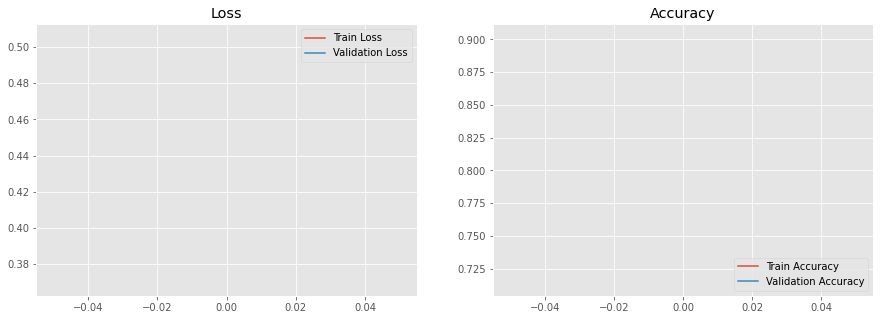

Weights Saved


In [2]:


train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

train_dataset = train.flow_from_directory("./trainTotal/", target_size = (80,80), batch_size = 200)

val_dataset = train.flow_from_directory("./valTotal/", batch_size = 200, target_size = (80,80))

model = Sequential([
    Input(shape=(80,80,3)),
    ZeroPadding2D((5,5)),
    Conv2D(16, 3, activation='relu'),
    BatchNormalization(),
    Conv2D(32, 3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    Conv2D(32, 5, activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    Conv2D(64, 3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model.summary()


checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False,
    save_frequency=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=50,
    verbose=1,
    mode='auto'
)

opt = Adam(learning_rate=1e-3)

callbacks = [checkpoint,earlystop]

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

epochs = 20
batch_size = 12

history = model.fit(
    train_dataset,
    batch_size=batch_size,
    steps_per_epoch=90676//batch_size//13,
    epochs=epochs,
    validation_data=val_dataset,
    validation_steps=28618//batch_size//13,
    callbacks=callbacks
    )

def show_final_history(history):
    
    plt.style.use("ggplot")
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].set_title('Loss')
    ax[1].set_title('Accuracy')
    ax[0].plot(history.history['loss'],label='Train Loss')
    ax[0].plot(history.history['val_loss'],label='Validation Loss')
    ax[1].plot(history.history['accuracy'],label='Train Accuracy')
    ax[1].plot(history.history['val_accuracy'],label='Validation Accuracy')
    
    ax[0].legend(loc='upper right')
    ax[1].legend(loc='lower right')
    plt.show();
    pass

show_final_history(history)
model.save("modelTotal27.h5")
print("Weights Saved")

C:\Users\dana\AppData\Local\Temp/ipykernel_16268/3909672565.py:38: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()
C:\Users\dana\AppData\Local\Temp/ipykernel_16268/3909672565.py:38: RuntimeWarning: divide by zero encountered in true_divide
  x /= x.std()


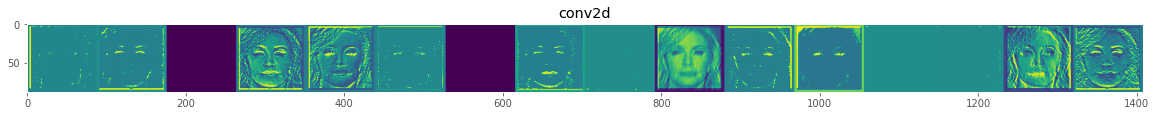

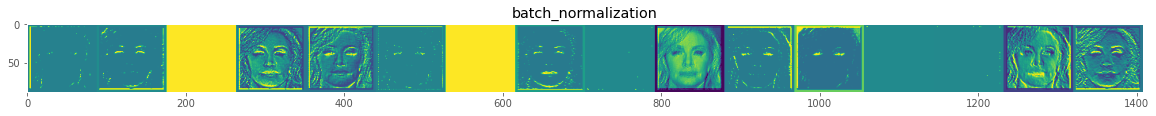

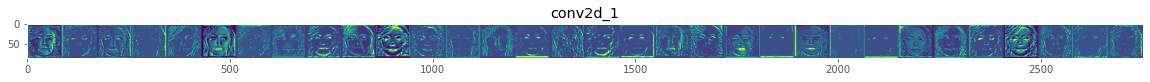

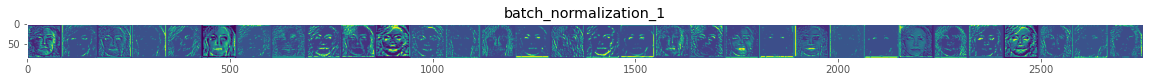

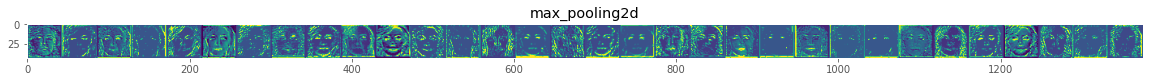

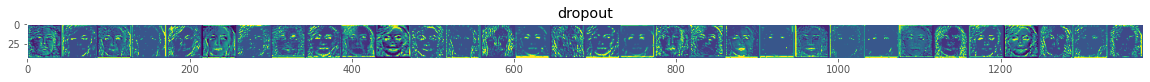

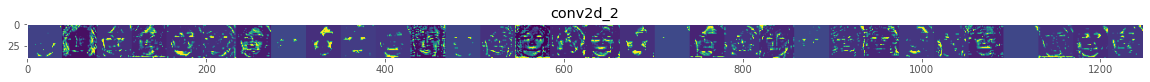

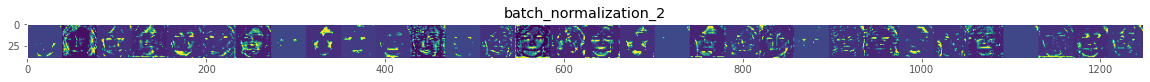

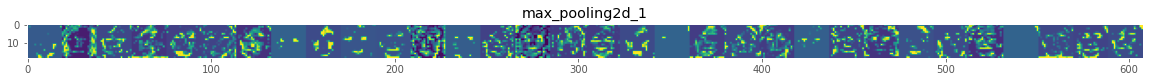

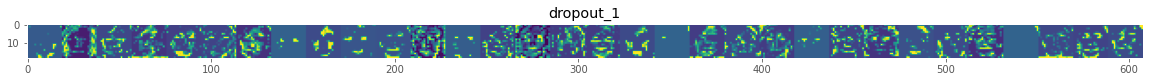

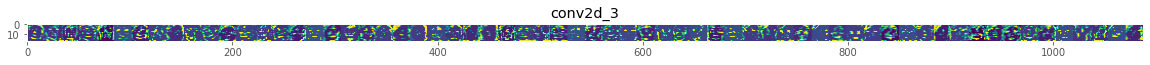

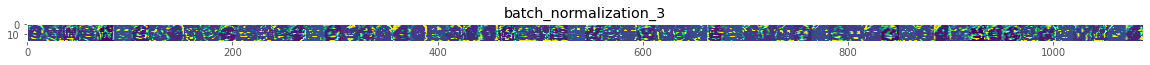

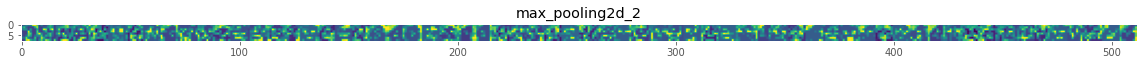

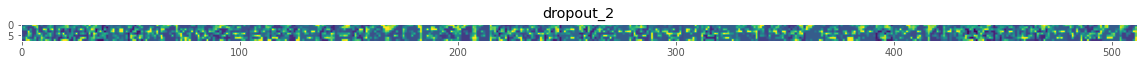

In [11]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

model = load_model('modelTotal27.h5')

# Define a new Model that will take an image as input, and will output 
# intermediate representations for all layers except the first layer.
layer_outputs = [layer.output for layer in model.layers[1:]]
visual_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

# Read your image
img = load_img('nov2021_train/067267.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape) # add one extra dimension to the front
x /= 255. # rescale by 1/255.

# run your image through the network; make a prediction
feature_maps = visual_model.predict(x)

# Plotting intermediate representations for your image

# Collect the names of each layer except the first one for plotting
layer_names = [layer.name for layer in model.layers[1:]]

# Plotting intermediate representation images layer by layer
for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_map.shape) == 4: # skip fully connected layers
        # number of features in an individual feature map
        n_features = feature_map.shape[-1]  
        # The feature map is in shape of (1, size, size, n_features)
        size = feature_map.shape[1] 
        # Tile our feature images in matrix `display_grid
        display_grid = np.zeros((size, size * n_features))
        # Fill out the matrix by looping over all the feature images of your image
        for i in range(n_features):
            # Postprocess each feature of the layer to make it pleasible to your eyes
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [9]:
dir_path = './nov2021_val/'

f = open("result27.txt", "a")
a = open("note27.txt", "a")
for i in os.listdir(dir_path):
    img = imageTF.load_img(dir_path + '' + i)
    X = imageTF.img_to_array(img)
    X = np.expand_dims(X, axis =0)
    images = np.vstack([X])
    
    val = model.predict(images)
    
    pred = str(int(val.item(0)))
    ligne = str(i) + " " + pred + "\r"
    f.write(ligne)
    a.write(pred + "\r")

a.close()
f.close()

In [116]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing import image

model = load_model('modelTotalMath.h5')
#img = load_img('nov2021_train/067730.jpg')
DIM = 80

def gradCAM(orig, l, intensity=0.5, res=250):
  img = image.load_img(orig, target_size=(DIM, DIM))
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  preds = model.predict(x)
  #print(decode_predictions(preds)[0][0][1]) # prints the class of image

  with tf.GradientTape() as tape:
    #last_conv_layer = model.get_layer('conv2d_3')
    last_conv_layer = model.layers[l]
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  size = int(math.sqrt(heatmap.size))
  heatmap = heatmap.reshape((size, size))

  img = cv2.imread(orig)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

  img = heatmap * intensity + img
  #plt.imshow(img)
  plt.imshow(heatmap)
  #cv2.imshow(cv2.resize(cv2.imread("nov2021_train/067267.jpg"), (res, res)))
  #cv2.imshow(cv2.resize(img, (res, res)))


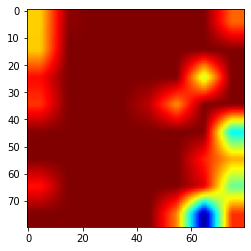

In [132]:
#gradCAM(img)
i = "nov2021_train/104287.jpg"
gradCAM(i,14)

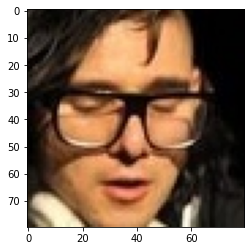

In [133]:
img = imageTF.load_img(i)
plt.imshow(img)

In [131]:
import tensorflow as tf
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
